**Instructions.** In this practical, you will walk through some examples on data transformation, exploration and imputation. You will need to solve some problems following the examples. Place your answers in the cell below the problems, and you may add new cells if needed. Make sure your code is included in your answers.

You may find it helpful to read through the whole notebook and learn from the examples first, before solving the problems.

# Part 1 Data Transformation

In computer programming, a *data type* of a variable determines what type of values it can contain and what operations can be performed. The following table summarises some of the common data types we will come across in R:

| Data Type | Example                     | R Code                      |
|-----------|-----------------------------|-----------------------------|
| Logical   | TRUE, FALSE                 | `v <- TRUE`                 |
| Numeric   | 12.3, 5, 999                | `v <- 23.5`                 |
| Integer   | 1L, 34L, 0L                 | `v <- 2L`                   |
| Character | "a", "good", "TRUE", '23.4' | `v <- "TRUE"`               |

You can use the `class(var)` syntax to determine what object type a variable is, as demonstrated in the following example:

In [1]:
char_var <- "12345" 
num_var <- 12345 
class(char_var)
class(num_var)

[1] "character"

[1] "numeric"

Having a dataset that contains inconsistent *data types* is a common data cleaning problem. The above example demonstrates two different ways the number 12345 could be expressed in a dataset, as a `character` or a `numeric` value. The data type of the variable determines what sort of operations can be performed on them.

Datasets that are interpreted as the wrong data type, or that are *inconsistent* need to be cleaned so that the desired operations can be performed on the dataset. If a column that is supposed to contain integers contains characters, for example, we can no longer run numeric functions such as `mean()` on those values:

In [2]:
a <- c(15, 20, 1, 10)
b <- c("15", "1", "4")

# Valid! We can compute the mean of numberic values.
print(mean(a))
# You can't compute the mean from a set of characters by a number.
print(mean(b))

[1] 11.5


Warning message in mean.default(b):
“argument is not numeric or logical: returning NA”

[1] NA


Luckily, R contains built-in functions designed to convert between data-types. If we use the `as.numeric()` function, we can attempt to convert a `character` to a `numeric type`. Let's try the above example again, making sure we convert the characters to a numeric value before attempting to run the `mean` function:

In [3]:
b <- c("15", "1", "4")
mean(as.numeric(b))

[1] 6.666667

Converting between data-types is a common feature of *data-cleaning* and *transformation*. Let's demonstrate by cleaning an example dataset.

This dataset is a modified version of food-borne gastrointestinal illness in the US in 1940. The data has been modified from the original to include Brisbane-based addresses and some more obvious data integrity issues have been injected.

In [4]:
library(readr)
oswego <- read_csv("OswegoTutorial.csv")

Parsed with column specification:
cols(
  .default = col_character(),
  sex = col_integer(),
  timesupper = col_integer(),
  onsettime = col_integer()
)
See spec(...) for full column specifications.


Our first step might be to explore the data and get a feel for the type of data we are working with. We can use the `head()` function to have a look at the first few rows of the data:

In [5]:
head(oswego)

age,sex,timesupper,ill,address,onsetdate,onsettime,bakedham,spinach,mashedpota,⋯,jello,rolls,brownbread,milk,coffee,water,cakes,vanilla,chocolate,fruitsalad
11,2,NA,no,"7104 Legend Avenue, Waterfront Place, QLD, 4001",NA,NA,no,no,no,⋯,no,no,no,no,no,no,no,no,yes,no
52,1,2000,yes,"7402 Woodhall Lane, Eagle Farm, QLD, 4009",19-Apr,30,yes,yes,yes,⋯,no,yes,no,no,yes,no,no,yes,no,no
65,2,1830,yes,"7206 Nikerton Street, Wintergarden, QLD, 4002",19-Apr,30,yes,yes,yes,⋯,no,no,no,no,yes,no,no,yes,yes,no
59,1,1830,yes,"579 Woodleaf Drive, Albion, QLD, 4010",19-Apr,30,yes,yes,no,⋯,no,no,no,no,yes,no,yes,yes,yes,no
13,1,NA,no,"3611 Nottingham Oaks Avenue, Spring Hill, QLD, 4000",NA,NA,no,no,no,⋯,no,no,no,no,no,no,no,no,yes,no
63,1,1930,yes,"5450 Cd Smith Way, New Farm, QLD, 4005",18-Apr,2230,yes,yes,no,⋯,yes,no,no,no,no,yes,no,yes,no,no


If we want to determine how large the dataset is, we can use the `dim()` function to determine the dimensions:

In [6]:
dim(oswego)

[1] 76 21

Let's have a closer look at the "age" column:

In [7]:
oswego$age

[1] "11"    "52"    "65"    "59"    "13"    "63"    "70"    "40"    "15"   
[10] "33"    "65"    "38"    "62"    "10"    "25"    "32"    "62"    "36"   
[19] "11"    "33"    "13"    "seven" "64"    "3"     "65"    "59"    "15"   
[28] "622"   "37"    "17"    "35"    "15"    "50"    "40"    "35"    "35"   
[37] "36"    "57"    "16"    "68"    "54"    "77"    "72"    "58"    "20"   
[46] "17"    "62"    "20"    "52"    "9"     "50"    "8"     "35"    "48"   
[55] "25"    "11"    "74"    "12"    "44"    "53"    "37"    "24"    "69"   
[64] "7"     "17"    "8"     "11"    "17"    "36"    "21"    "60"    "18"   
[73] "14"    "52"    "45"    NA

Do you notice anything odd about this row? It looks like there was a data input error, and the number 7 has been inserted as the word "seven". Let's see how this affects our data analysis by trying to run the mean() function on the age column to determine the average age of people in our dataset.

In [8]:
mean(oswego$age)

Warning message in mean.default(oswego$age):
“argument is not numeric or logical: returning NA”

[1] NA

As you can see, we get an error, saying that the "argument is not numeric or logical". It looks like we can only run the mean function on a column that is *numeric* or *logical*. What data type is the age column?

In [9]:
class(oswego$age)

[1] "character"

We can see that R has interpreted this column as the 'character' data type, which explains why we can't run the mean function on it. Let's first replace the character(s) "seven" with "7" so that we can easily convert the whole column to a numeric data type.

In [10]:
oswego$age[oswego$age == "seven"] <- "7"

Let's break down the above query a little bit. The `oswego$age == "seven"` is what is called a *conditional statement*, it matches values in `oswego$age` according to a specific condition. In this case, we match any of the rows that have the value "seven". We then set any of these rows to the character "7" instead.

|<center>TASK</center>|
| ---- |
| Convert the age column to the correct data-type (numeric). What is the mean of the ages? |

---
**Solution**

**Note: Never replace null values with 0

In [11]:
### Solution 1
OmitNA<-na.omit(oswego$age) # The NA value is omitted and remaining data is stored in OmitNA
AsNum<-as.numeric(OmitNA) # OmitNA from previous step is stored as numberic in AsNum
mean(AsNum) # Mean is calculated

### Solution 2 (break this one-liner down to understand it)
mean(as.numeric(oswego$age)[!is.na(oswego$age)])

### Solution 3 (a neater solution)
mean(as.numeric(oswego$age), na.rm=TRUE)

[1] 44.28

[1] 44.28

[1] 44.28

---

You may have noticed that in our `oswego` dataset, we have the full address of each patient. Can you think of how this may be useful?

One use of this locational data might be to see if outbreaks are clustered around particular suburbs/areas. In this case, being able to query the postcode directly would be useful, but currently the postcode is within the 'Address' column, which has the format:

```
38 Jones Road, South Brisbane, QLD 4101
```

One common aspect of preparing your data for use is making sure that it is in a format that is as simple to query as possible. For example, in the above case, if we wanted to find out what the most common suburb is which contained an outbreak, we would not be able to easily query suburb specifically with the `address` column as it contains a lot of superflous information.

One solution might be to transform the data so each part of the address is in its own column - that way we query against a much simpler attribute such as postcode.

Let's demonstrate this by splitting up the "onsetdate" column first as an example. You can see that the `onsetdate` is in the format:

```
19-Apr
```
If we wanted to query directly by month, we could separate the "Month" part of the address directly into its own column. Let's do that. We will use the "tidyr" library in R, a popular data transformation library. Run the code below and try and understand what it is doing.

In [12]:
library(tidyr)

oswego_new <- separate(oswego, onsetdate, into = c("onset_day", "onset_month"), sep = "-")
head(oswego_new)

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 1 rows [24].”

age,sex,timesupper,ill,address,onset_day,onset_month,onsettime,bakedham,spinach,⋯,jello,rolls,brownbread,milk,coffee,water,cakes,vanilla,chocolate,fruitsalad
11,2,NA,no,"7104 Legend Avenue, Waterfront Place, QLD, 4001",NA,NA,NA,no,no,⋯,no,no,no,no,no,no,no,no,yes,no
52,1,2000,yes,"7402 Woodhall Lane, Eagle Farm, QLD, 4009",19,Apr,30,yes,yes,⋯,no,yes,no,no,yes,no,no,yes,no,no
65,2,1830,yes,"7206 Nikerton Street, Wintergarden, QLD, 4002",19,Apr,30,yes,yes,⋯,no,no,no,no,yes,no,no,yes,yes,no
59,1,1830,yes,"579 Woodleaf Drive, Albion, QLD, 4010",19,Apr,30,yes,yes,⋯,no,no,no,no,yes,no,yes,yes,yes,no
13,1,NA,no,"3611 Nottingham Oaks Avenue, Spring Hill, QLD, 4000",NA,NA,NA,no,no,⋯,no,no,no,no,no,no,no,no,yes,no
63,1,1930,yes,"5450 Cd Smith Way, New Farm, QLD, 4005",18,Apr,2230,yes,yes,⋯,yes,no,no,no,no,yes,no,yes,no,no


|<center>TASK</center>|
| ---- |
| There is a warning message for 1 row in the above conversion. Indeed, there is an issue with the data if you examine the content of that row. Write your R code to fix the issue and regenerate the `oswego_new` dataframe.|

---
**Solution**

The warning message is about row 24. By inspecting `oswego[24, 'onsetdate']`, we can see that it has value `18/4`, not in the day-month format. This can be fixed as follows.

In [13]:
oswego[24,'onsetdate'] = '18-Apr'
oswego_new <- separate(oswego, onsetdate, into = c("onset_day", "onset_month"), sep = "-")

---

Now that we've separated the columns, we can directly query "month" to see the range of months that these outbreaks occurred.

In [14]:
unique(oswego_new$onset_month)

[1] NA    "Apr" "Jun"

We can see that this data is limited to April, June and also that a lot of the onset date data is missing, resulting in 'NA' values. Now let's see how we can get useful information from the location information.

|<center>TASK</center>|
| ---- |
| Separate the "address" column into four new columns, `address`, `suburb_name`, `state` and `postcode` |

In [15]:
library(tidyr)
oswego_address_separate <- separate(oswego, address, into = c("address", "suburb_name", "state", "postcode"), sep = ",")
head(oswego_address_separate)

age,sex,timesupper,ill,address,suburb_name,state,postcode,onsetdate,onsettime,⋯,jello,rolls,brownbread,milk,coffee,water,cakes,vanilla,chocolate,fruitsalad
11,2,NA,no,7104 Legend Avenue,Waterfront Place,QLD,4001,NA,NA,⋯,no,no,no,no,no,no,no,no,yes,no
52,1,2000,yes,7402 Woodhall Lane,Eagle Farm,QLD,4009,19-Apr,30,⋯,no,yes,no,no,yes,no,no,yes,no,no
65,2,1830,yes,7206 Nikerton Street,Wintergarden,QLD,4002,19-Apr,30,⋯,no,no,no,no,yes,no,no,yes,yes,no
59,1,1830,yes,579 Woodleaf Drive,Albion,QLD,4010,19-Apr,30,⋯,no,no,no,no,yes,no,yes,yes,yes,no
13,1,NA,no,3611 Nottingham Oaks Avenue,Spring Hill,QLD,4000,NA,NA,⋯,no,no,no,no,no,no,no,no,yes,no
63,1,1930,yes,5450 Cd Smith Way,New Farm,QLD,4005,18-Apr,2230,⋯,yes,no,no,no,no,yes,no,yes,no,no


|<center>TASK</center>|
| ---- |
| Which postcode has the most occurrences of illness? Remember, you will need to filter your data by only those who are ill. |


In [16]:
###### Solution 1
#filter data with those who are ill
oswego_ill <- oswego_address_separate[oswego_address_separate[,4]=="yes",]

#aggregate by postcode
Postcode_Count = aggregate(ill~postcode, oswego_ill, length)

#find and display postcode with maximum occurances of ill
Postcode_Max <- Postcode_Count[Postcode_Count[,2]== max(Postcode_Count$ill), ] 
Postcode_Max

##### Solution 2
#filter data with those who are ill
oswego_ill <- oswego_address_separate[oswego_address_separate[,4]=="yes",]

#generate a frequency table
freqs = table(oswego_ill[,'postcode'])

#find and display postcode with maximum occurrances of ill
freqs[freqs==max(freqs)]
#also try which(freqs==max(freqs)), and names(which(freqs==max(freqs)))

,postcode,ill
6,4006,5
9,4010,5



 4006  4010 
    5     5 

|<center>Extension TASK</center>|
| ---- |
| List all postcodes and number of occurences using (1) R and (2) MySQL (tip: use group by query). This question will not be graded.|

In [17]:
Postcode_Count

postcode,ill
4000,2
4001,2
4002,1
4004,3
4005,1
4006,5
4007,3
4009,2
4010,5
4012,1


|<center>TASK</center>|
| ---- |
| Calculate the mean age for each postcode, with `na` excluded. Is there any anomaly in the result? If yes, what is the cause?|

---
**Solution**

We can use the `aggregrate` function.

In [18]:
oswego_address_separate$age = as.numeric(oswego_address_separate$age)
df = aggregate(cbind(age=age, count=1) ~ postcode, oswego_address_separate, sum)
df$age = df$age / df$count
df

postcode,age,count
4000,35.75000,4
4001,27.14286,7
4002,57.50000,2
4004,38.00000,3
4005,50.50000,2
4006,41.83333,6
4007,26.33333,3
4008,23.50000,2
4009,33.50000,2
4010,51.00000,6


`4021` has a mean age of 171.25! By inspecting the ages of people living there, we can see that one person has age 622! Clearly there is a data-entry error.

In [19]:
oswego_address_separate$age[oswego_address_separate$postcode == ' 4021']

[1]  36 622  15  12

---

# Part 2 Data Exploration

In Prac. 1, we first encountered the HR Analytics dataset.

The question we seek to answer is: *Why are our best and most experienced employees leaving?*

To get to grips with the data, we will carry out some exploratory data analysis (EDA) techniques in R.

Firstly, let's import the data and look at a few rows.

In [20]:
library(readr)
HR_comma_sep <- read_csv("https://stluc.manta.uqcloud.net/mdatascience/public/datasets/HumanResourceAnalytics/HR_comma_sep.csv")
HR_comma_sep

Parsed with column specification:
cols(
  satisfaction_level = col_double(),
  last_evaluation = col_double(),
  number_project = col_integer(),
  average_montly_hours = col_integer(),
  time_spend_company = col_integer(),
  Work_accident = col_integer(),
  left = col_integer(),
  promotion_last_5years = col_integer(),
  sales = col_character(),
  salary = col_character()
)


satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0.38,0.53,2,157,3,0,1,0,sales,low
0.80,0.86,5,262,6,0,1,0,sales,medium
0.11,0.88,7,272,4,0,1,0,sales,medium
0.72,0.87,5,223,5,0,1,0,sales,low
0.37,0.52,2,159,3,0,1,0,sales,low
0.41,0.50,2,153,3,0,1,0,sales,low
0.10,0.77,6,247,4,0,1,0,sales,low
0.92,0.85,5,259,5,0,1,0,sales,low
0.89,1.00,5,224,5,0,1,0,sales,low
0.42,0.53,2,142,3,0,1,0,sales,low


|<center>TASK</center>|
| ---- |
| What type of variable is `left`? Here "type" refers to the variable types mentioned in lecture. |

---
**Solution.**

`left` is a binary/boolean variable indicating whether an employee has left or not. It is a special kind of categorical variable. 

You may confirm that `left` indeed has two values only by running `unique(HR_comma_sep$left)`.

---

Now, let's count the number of rows with missing data.

In [21]:
sum(!complete.cases(HR_comma_sep))

[1] 0

Since there is no missing data, we can proceed with our analysis on the complete data set.

Let's explore some simple quantitative summaries.  The default summary statistics are as follows.

In [22]:
summary(HR_comma_sep)

 satisfaction_level last_evaluation  number_project  average_montly_hours
 Min.   :0.0900     Min.   :0.3600   Min.   :2.000   Min.   : 96.0       
 1st Qu.:0.4400     1st Qu.:0.5600   1st Qu.:3.000   1st Qu.:156.0       
 Median :0.6400     Median :0.7200   Median :4.000   Median :200.0       
 Mean   :0.6128     Mean   :0.7161   Mean   :3.803   Mean   :201.1       
 3rd Qu.:0.8200     3rd Qu.:0.8700   3rd Qu.:5.000   3rd Qu.:245.0       
 Max.   :1.0000     Max.   :1.0000   Max.   :7.000   Max.   :310.0       
 time_spend_company Work_accident         left        promotion_last_5years
 Min.   : 2.000     Min.   :0.0000   Min.   :0.0000   Min.   :0.00000      
 1st Qu.: 3.000     1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.00000      
 Median : 3.000     Median :0.0000   Median :0.0000   Median :0.00000      
 Mean   : 3.498     Mean   :0.1446   Mean   :0.2381   Mean   :0.02127      
 3rd Qu.: 4.000     3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:0.00000      
 Max.   :10.000     Max.  

These statistics tell us a bit about each variable in isolation; what we would like to do is obtain statistics pertinent to our question.

To proceed, it is useful to classify each variable as either a *response* or a *predictor*.  For this problem and data set, it is clear that `left` is the response and all other variables are predictors.

For example: What is the breakdown of `left` by job Department (`sales`)?

This is easily achieved by creating a *two-way contingency* table, which counts the number of intances in each `left` by `sales` cell in a two by two table.

In [23]:
test_table<-table(HR_comma_sep$sales,HR_comma_sep$left)
test_table

             
                 0    1
  accounting   563  204
  hr           524  215
  IT           954  273
  management   539   91
  marketing    655  203
  product_mng  704  198
  RandD        666  121
  sales       3126 1014
  support     1674  555
  technical   2023  697

Marginal counts and proportions are easily created as follows.

In [24]:
margin.table(test_table) 
margin.table(test_table,1)
margin.table(test_table,2)

prop.table(test_table)
prop.table(test_table,1)
prop.table(test_table,2)

[1] 14999


 accounting          hr          IT  management   marketing product_mng 
        767         739        1227         630         858         902 
      RandD       sales     support   technical 
        787        4140        2229        2720 


    0     1 
11428  3571 

             
                        0           1
  accounting  0.037535836 0.013600907
  hr          0.034935662 0.014334289
  IT          0.063604240 0.018201213
  management  0.035935729 0.006067071
  marketing   0.043669578 0.013534236
  product_mng 0.046936462 0.013200880
  RandD       0.044402960 0.008067204
  sales       0.208413894 0.067604507
  support     0.111607440 0.037002467
  technical   0.134875658 0.046469765

             
                      0         1
  accounting  0.7340287 0.2659713
  hr          0.7090663 0.2909337
  IT          0.7775061 0.2224939
  management  0.8555556 0.1444444
  marketing   0.7634033 0.2365967
  product_mng 0.7804878 0.2195122
  RandD       0.8462516 0.1537484
  sales       0.7550725 0.2449275
  support     0.7510094 0.2489906
  technical   0.7437500 0.2562500

             
                       0          1
  accounting  0.04926496 0.05712686
  hr          0.04585229 0.06020722
  IT          0.08347917 0.07644917
  management  0.04716486 0.02548306
  marketing   0.05731537 0.05684682
  product_mng 0.06160308 0.05544665
  RandD       0.05827791 0.03388407
  sales       0.27353868 0.28395407
  support     0.14648232 0.15541865
  technical   0.17702135 0.19518342

These proportions can also be conveniently visualised using a mosaic plot, where the widths of rectangles are proportional to the number of observations in the x variable categories (`Department`), and, for each x variable category, the heights are proportional to the number of observations in the corresponding y variable categories (`Left`).

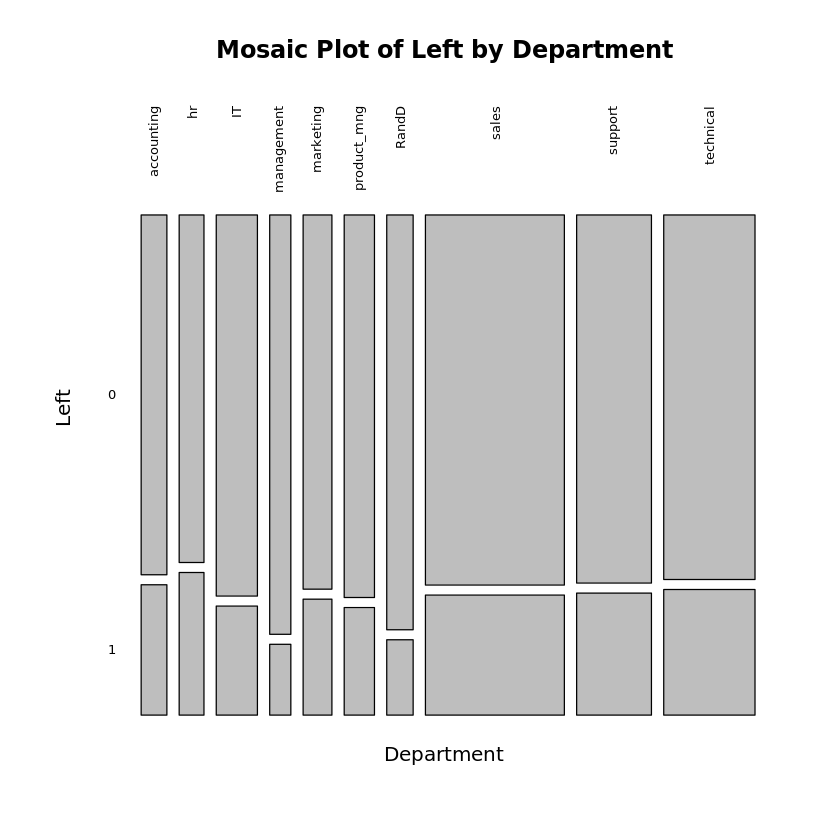

In [25]:
mosaicplot(test_table,main="Mosaic Plot of Left by Department",xlab="Department",ylab="Left",las=2)

|<center>TASK</center>|
| ---- |
| Which Department has the highest proportion of employees that have left, relative to that department?  Which Department has the lowest? |

---
**Solution**

HR has the highest proportion of employees that have left. Management has the lowest proportion of employees that have left.

---

How about the breakdown of average hours worked per month by left?

We will first create visual summaries using boxplots (which display summary statistics visually).

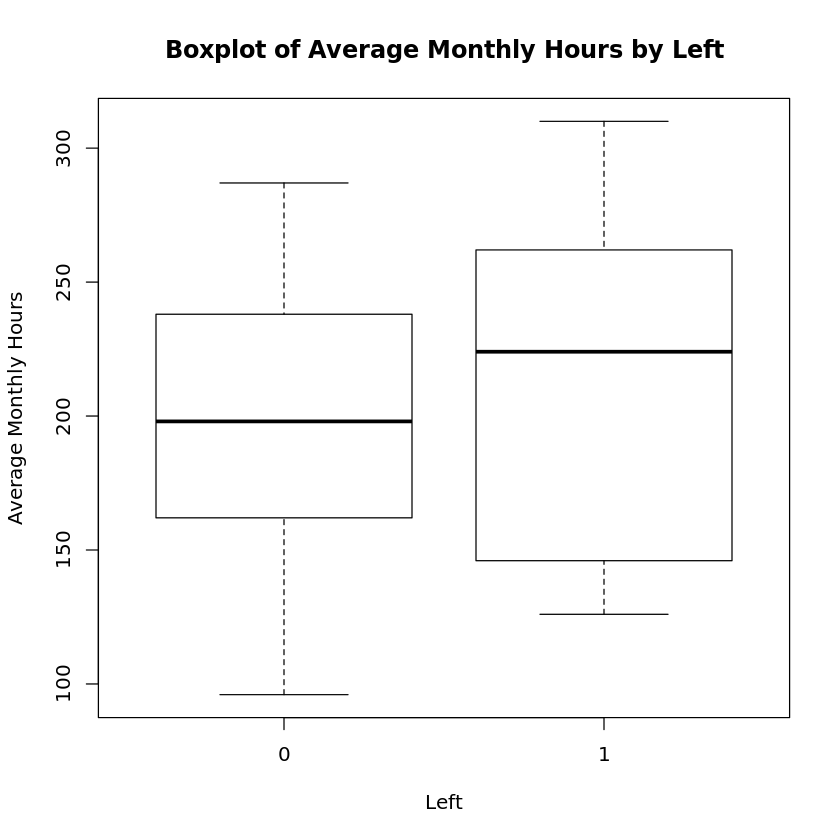

In [26]:
boxplot(HR_comma_sep$average_montly_hours~HR_comma_sep$left,xlab="Left",ylab="Average Monthly Hours",main="Boxplot of Average Monthly Hours by Left")

This simple visual summary suggests that employees that left typically worked longer hours.

We can get a more detailed view by constructing a histogram as follows.

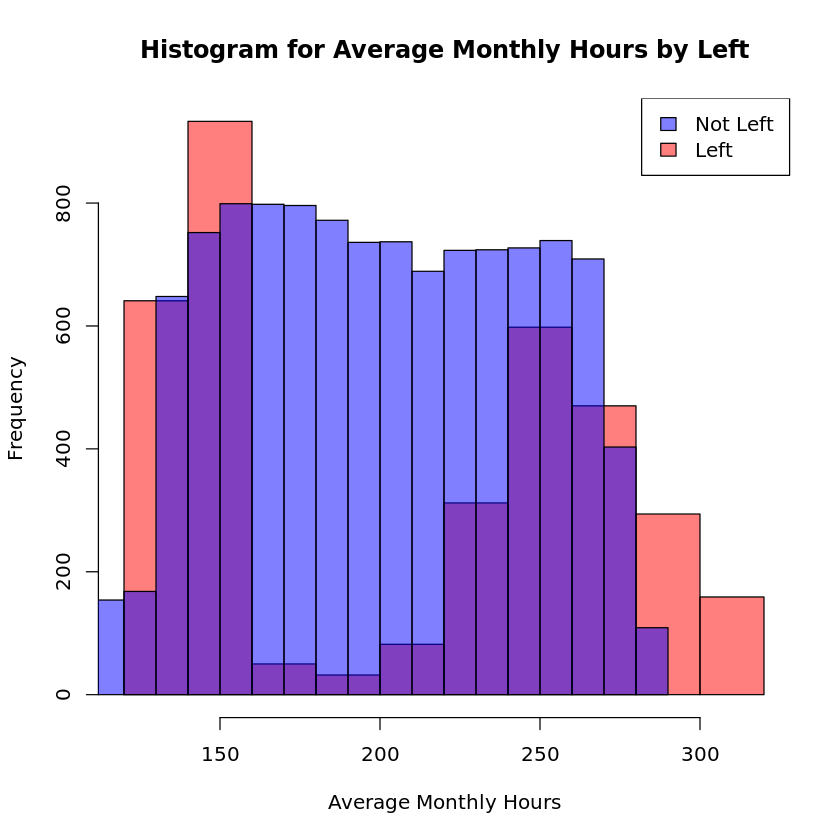

In [27]:
hist(HR_comma_sep$average_montly_hours[HR_comma_sep$left==1], col=rgb(1,0,0,0.5),main="Histogram for Average Monthly Hours by Left", xlab="Average Monthly Hours")
hist(HR_comma_sep$average_montly_hours[HR_comma_sep$left==0], col=rgb(0,0,1,0.5),add=TRUE)
legend("topright", c("Not Left","Left"),fill=c(rgb(0,0,1,0.5), rgb(1,0,0,0.5)))

The histogram reveals an interesting feature of the data; the distribution of average monthly hours for employees that left is *multimodal*.  This suggests employees that leave fall into two groups: those that work normal hours and those that work long hours.

The same information can be seen from a plot of the empirical cumulative distribution function (ecdf) for average monthly hours by left.

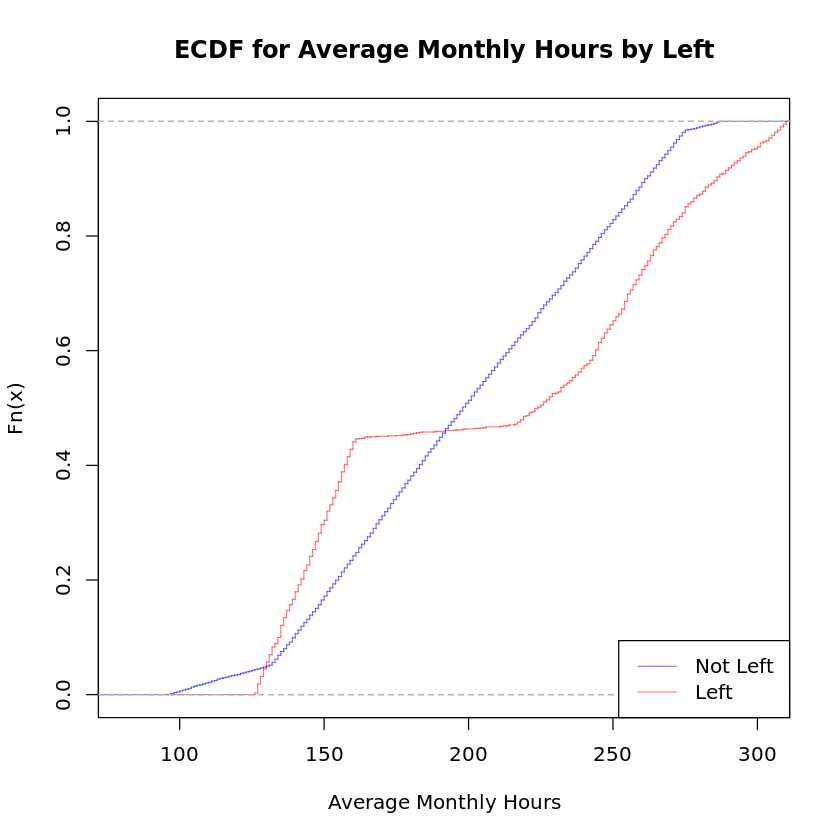

In [28]:
E0<-ecdf(HR_comma_sep$average_montly_hours[HR_comma_sep$left==0])
E1<-ecdf(HR_comma_sep$average_montly_hours[HR_comma_sep$left==1])
plot(E0,col=rgb(0,0,1,0.5),verticals = TRUE, do.points = FALSE,main="ECDF for Average Monthly Hours by Left", xlab="Average Monthly Hours")
plot(E1,col=rgb(1,0,0,0.5),verticals = TRUE, do.points = FALSE,add=TRUE)
legend("bottomright", c("Not Left","Left"),lwd=1, lty=c(1,1),col=c(rgb(0,0,1,0.5), rgb(1,0,0,0.5)))

We can also look at the time spent in the company by left.

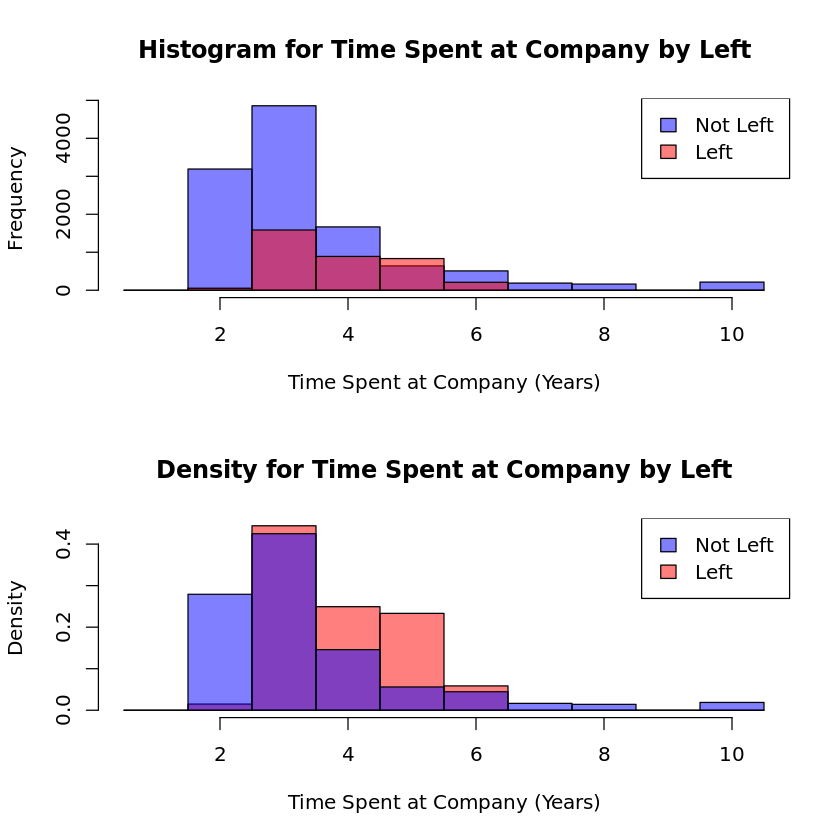

In [29]:
par(mfrow=c(2,1)) # Create 2 by 1 figure
# Plot Frequencies
hist(HR_comma_sep$time_spend_company[HR_comma_sep$left==0],breaks=c(0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5),col=rgb(0,0,1,0.5),main="Histogram for Time Spent at Company by Left", xlab="Time Spent at Company (Years)",freq=TRUE)
hist(HR_comma_sep$time_spend_company[HR_comma_sep$left==1],breaks=c(0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5),col=rgb(1,0,0,0.5),add=TRUE,freq=TRUE)
legend("topright", c("Not Left","Left"),fill=c(rgb(0,0,1,0.5), rgb(1,0,0,0.5)))

# Plot Proportions
hist(HR_comma_sep$time_spend_company[HR_comma_sep$left==1],breaks=c(0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5),col=rgb(1,0,0,0.5),main="Density for Time Spent at Company by Left", xlab="Time Spent at Company (Years)",freq=FALSE)
hist(HR_comma_sep$time_spend_company[HR_comma_sep$left==0],breaks=c(0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5),col=rgb(0,0,1,0.5),add=TRUE,freq=FALSE)
legend("topright", c("Not Left","Left"),fill=c(rgb(0,0,1,0.5), rgb(1,0,0,0.5)))

We see from the above plots that the densities (`Density`) are easier than the frequency counts to visually compare, although relative magnitude information is lost in the process.

The shape of the distributions for time spent at the company are noticably different, with employees that have been at the company for very short of very long periods of time being less likely to leave.  Most employees that leave the company have worked there for between three and five years, inclusive. 

|<center>TASK</center>|
| ---- |
| Construct a histogram for last evaluation by left.  What is a possible explanation for any patterns you see? |

---
**Solution**

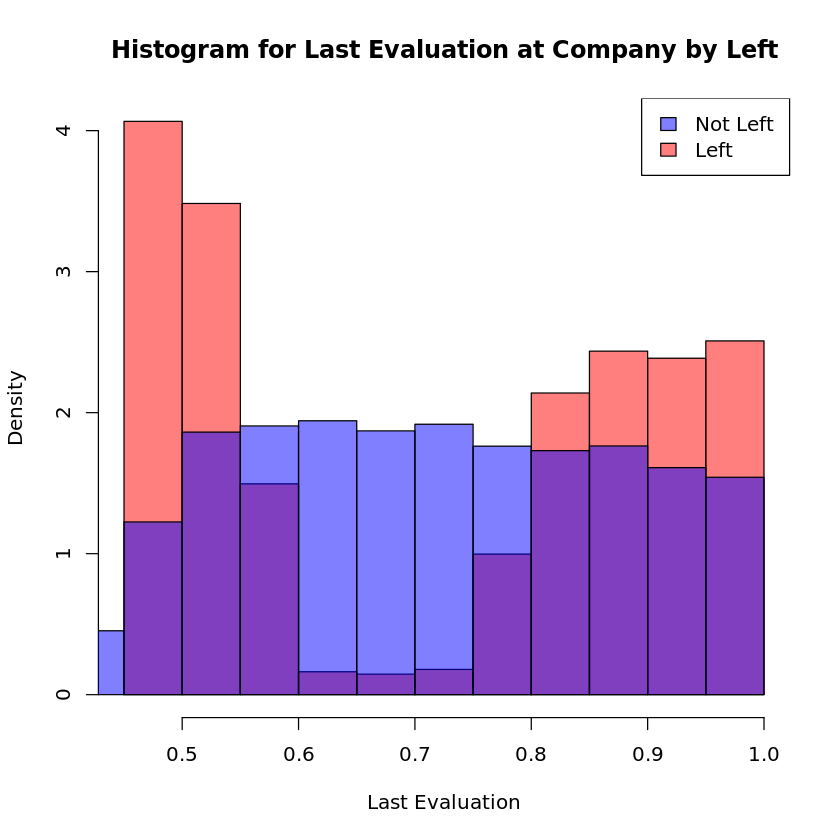

In [30]:
# Plot Density
hist(HR_comma_sep$last_evaluation[HR_comma_sep$left==1],col=rgb(1,0,0,0.5),main="Histogram for Last Evaluation at Company by Left", xlab="Last Evaluation",freq=FALSE)
hist(HR_comma_sep$last_evaluation[HR_comma_sep$left==0],col=rgb(0,0,1,0.5),add=TRUE,freq=FALSE)
legend("topright", c("Not Left","Left"),fill=c(rgb(0,0,1,0.5), rgb(1,0,0,0.5)))

The evaluations for people who left show a bimodal pattern: their last evaluations are either higher than average or lower than average. Those with high evaluation perhaps believed their compensation after evaluation was insignificant. Those with low evaluation possibly left for similiar reasons, as there is an implicit feeling of undervaluedness.

---

|<center>TASK</center>|
| ---- |
| Construct density plots to compare the average monthly working hours, satisfaction level, and last evaluation for those who left management and HR. Are the patterns similar or different for these two departments?|

---
**Solution**

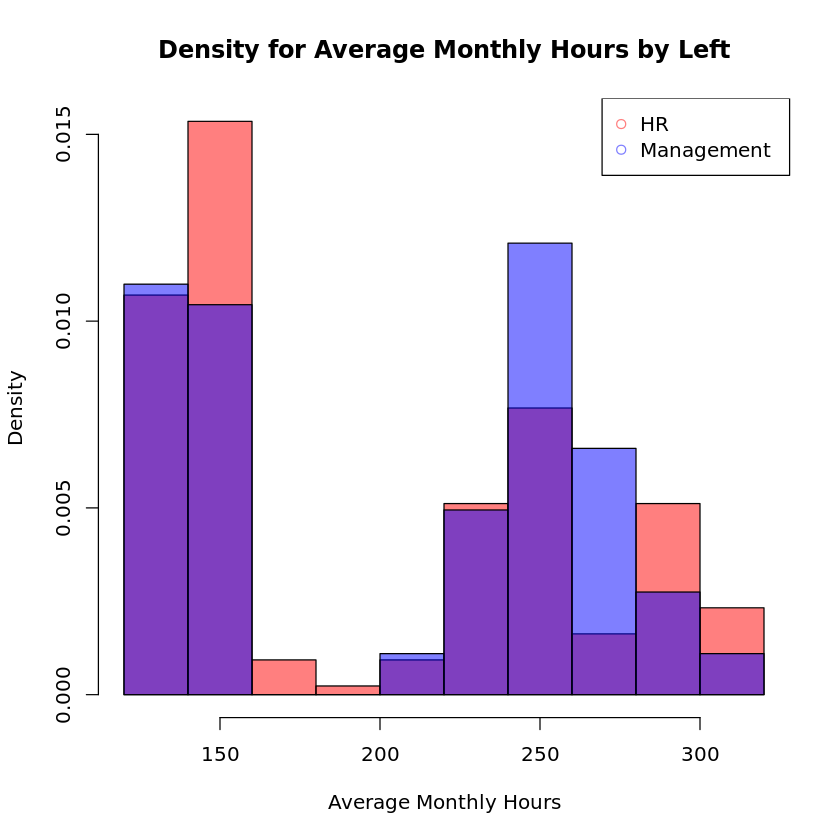

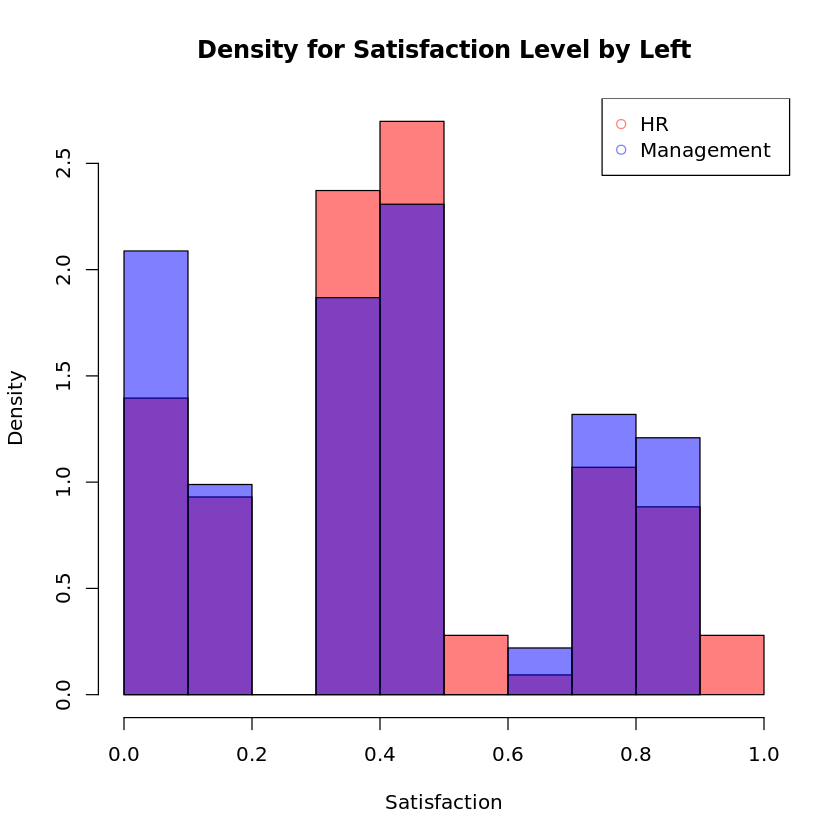

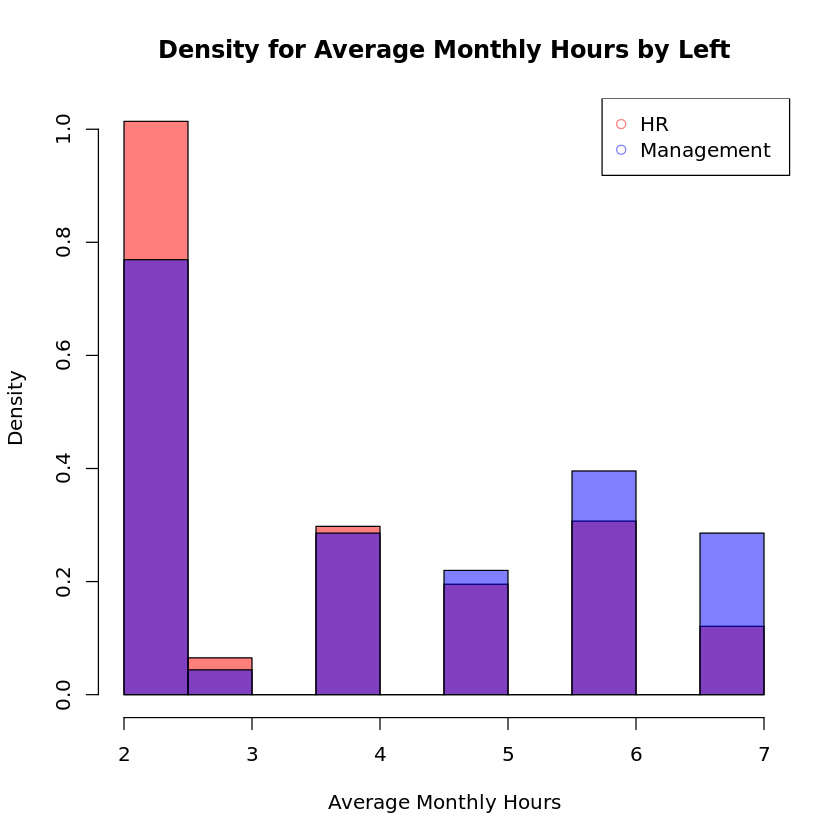

In [31]:
HR_management = subset(HR_comma_sep, sales == 'management' & left == 1)
HR_hr = subset(HR_comma_sep, sales == 'hr' & left==1)

hist(HR_hr$average_montly_hours, col=rgb(1,0,0,0.5), freq=FALSE,
     main="Density for Average Monthly Hours by Left", xlab="Average Monthly Hours")
hist(HR_management$average_montly_hours, col=rgb(0,0,1,0.5), freq=FALSE, add=TRUE)
legend("topright", c("HR", "Management"),pch=c(1,1),col=c(rgb(1,0,0,0.5), rgb(0,0,1,0.5)))

hist(HR_hr$satisfaction_level, col=rgb(1,0,0,0.5), freq=FALSE,
    main="Density for Satisfaction Level by Left", xlab="Satisfaction")
hist(HR_management$satisfaction_level, col=rgb(0,0,1,0.5), freq=FALSE, add=TRUE)
legend("topright", c("HR", "Management"),pch=c(1,1),col=c(rgb(1,0,0,0.5), rgb(0,0,1,0.5)))

hist(HR_hr$number_project, col=rgb(1,0,0,0.5), freq=FALSE, 
     main="Density for Average Monthly Hours by Left", xlab="Average Monthly Hours")
hist(HR_management$number_project, col=rgb(0,0,1,0.5), freq=FALSE, add=TRUE)
legend("topright", c("HR", "Management"),pch=c(1,1),col=c(rgb(1,0,0,0.5), rgb(0,0,1,0.5)))

The density plots for the two departments are slightly different, but qualitatively similar. This suggests that being in a specific department may not be an important reason for why people leave.

---

Suppose we wish to plot last evaluation and average monthly hours by leave.  One way to do this is with a scatter plot.

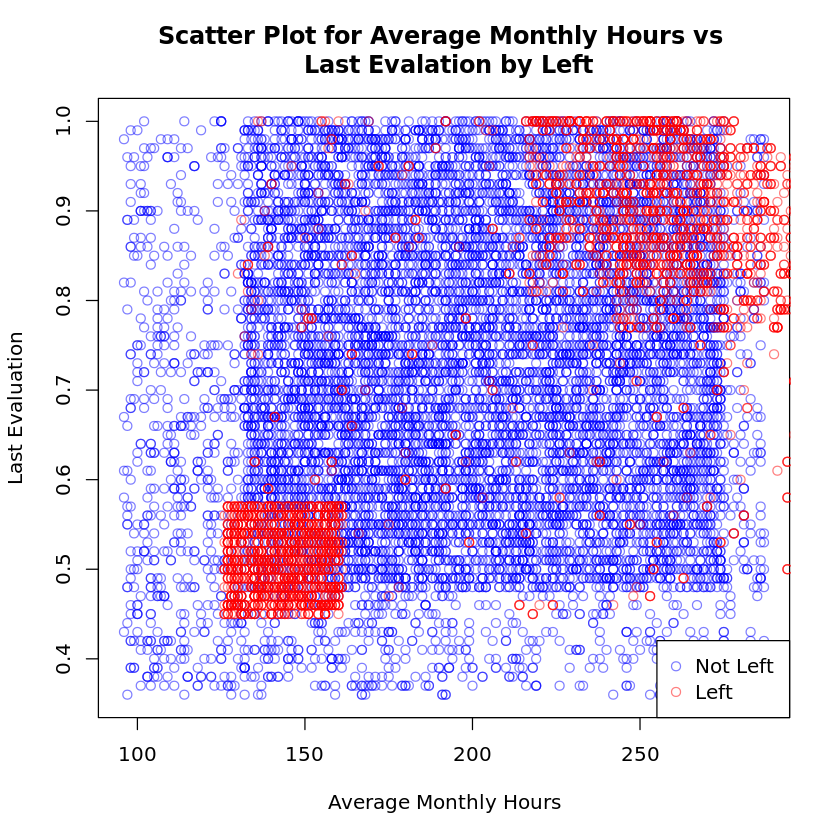

In [32]:
plot(HR_comma_sep$average_montly_hours[HR_comma_sep$left==0],HR_comma_sep$last_evaluation[HR_comma_sep$left==0],main="Scatter Plot for Average Monthly Hours vs \n Last Evalation by Left", xlab="Average Monthly Hours",ylab="Last Evaluation",col=rgb(0,0,1,0.5))
points(HR_comma_sep$average_montly_hours[HR_comma_sep$left==1],HR_comma_sep$last_evaluation[HR_comma_sep$left==1],col=rgb(1,0,0,0.5))
legend("bottomright", c("Not Left","Left"),pch=c(1,1),col=c(rgb(0,0,1,0.5), rgb(1,0,0,0.5)))

From the scatter plot, we gain additional insight into the relationship between last evaluation, average monthly hours, and those that left.  The bulk of those leaving that worked normal hours also received low evaluations, and most of those leaving that worked long hours received high evaluations.

We can break down the scatterplot further by an additional variable with the construction of a scatter plot matrix.  For instance, we might be curious how satisfaction level, last evaluation, average monthly hours, and left relate to each other.

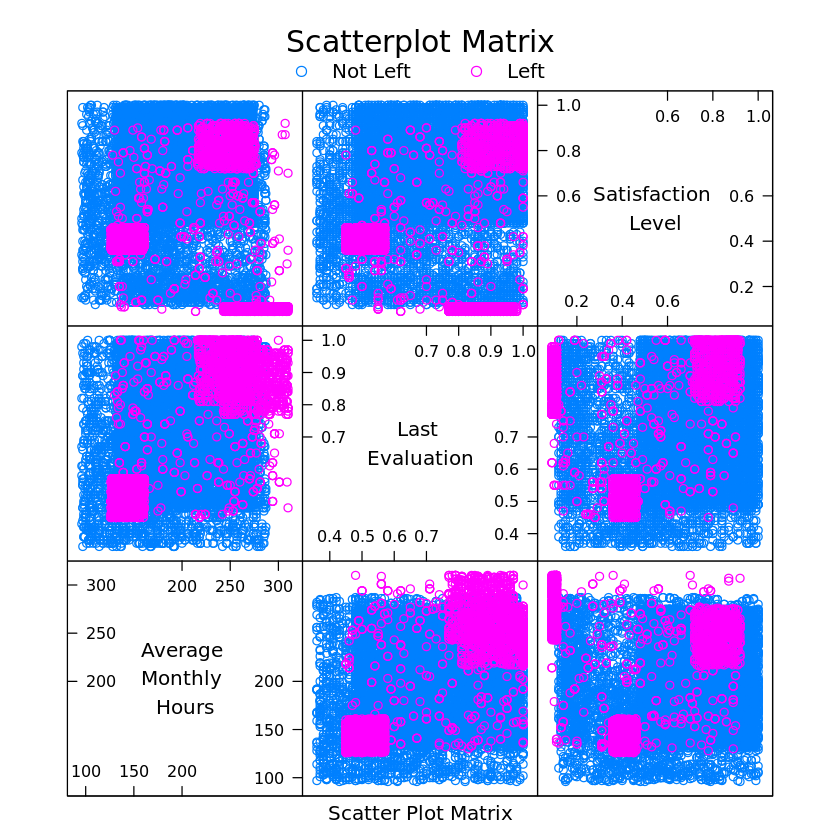

In [33]:
library("lattice") #Load the `Lattice' graphics package
HR_subset<-subset(as.data.frame(HR_comma_sep),select=c('average_montly_hours', 'last_evaluation', 'satisfaction_level', 'left'))
super.sym <- trellis.par.get("superpose.symbol") #Get Symbol Plotting Information
splom(~HR_subset[1:3],groups=left,data = HR_subset,varnames=c("Average \nMonthly \nHours","Last \nEvaluation","Satisfaction \nLevel"),
      key = list(title = "Scatterplot Matrix",
                 columns = 2, 
                 points = list(pch = super.sym$pch[1:2],
                 col = super.sym$col[1:2]),
                 text = list(c("Not Left", "Left"))))

The above code produces a very high quality scatter plot, but has a lot of parameters to set. In practice, we typically want to get a quick and dirty (but working) plot first. This can be achieved using a one-liner `splom(~HR_subset[1:3], groups=left, data=HR_subset)`, or an even simpler one-liner `splom(~HR_subset[1:3], groups=HR_subset$left)`. Try these out. Also try this one-liner: `pairs(HR_subset[,1:3], col=as.factor(HR_subset$left))`.

|<center>TASK</center>|
| ---- |
| We have demonstrated the use of a few tools for visually exploring the relationships between two variables, including mosaic plot, boxplot, histogram, ECDF plot, scatter plots. Write code to apply these tools (if applicable) to visually explore the relationship between of the number of projects and leaving. What is a possible explanation for any patterns you see? |

---
**Solution**

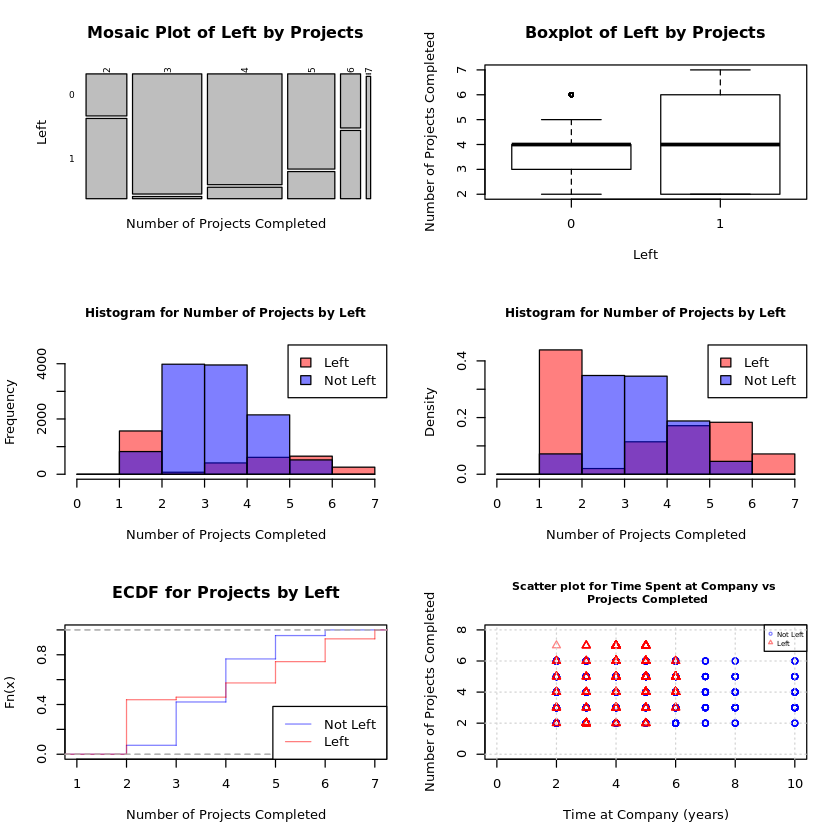

In [34]:
# Explore number of projects and left

# Create multiple figure
par(mfrow=c(3,2))

# Plot properties
label1 <- 'Number of Projects Completed'
label2 <- 'Left'
xBreaks <- c(seq(0, 7, length=8))
red <- rgb(1,0,0,0.5)
blue <- rgb(0,0,1,0.5)

# Table for mosaic
project_table <- table(HR_comma_sep$number_project, HR_comma_sep$left)

# mosaic
mosaicplot(project_table, main="Mosaic Plot of Left by Projects", xlab=label1, ylab=label2, las=2)

# boxplot
boxplot(HR_comma_sep$number_project~HR_comma_sep$left, xlab=label2, ylab=label1, main='Boxplot of Left by Projects')

# histogram - frequency
hist(HR_comma_sep$number_project[HR_comma_sep$left==1], col=red, freq=TRUE, breaks=xBreaks, ylim=c(0,4500),
    main='Histogram for Number of Projects by Left', cex.main=0.9, xlab=label1)
hist(HR_comma_sep$number_project[HR_comma_sep$left==0], add=TRUE, col=blue, freq=TRUE, breaks=xBreaks, cex.main=0.9)
legend('topright', c('Left', 'Not Left'), fill=c(red, blue))

# histogram - density
hist(HR_comma_sep$number_project[HR_comma_sep$left==1], col=red, freq=FALSE, breaks=xBreaks,
    main='Histogram for Number of Projects by Left', cex.main=0.9, xlab=label1)
hist(HR_comma_sep$number_project[HR_comma_sep$left==0], add=TRUE, col=blue, freq=FALSE, breaks=xBreaks, 
     cex.main=0.9)
legend('topright', c('Left', 'Not Left'), fill=c(red, blue))

# Empircal Cumulative Distribution 
E0 <- ecdf(HR_comma_sep$number_project[HR_comma_sep$left==0])
E1 <- ecdf(HR_comma_sep$number_project[HR_comma_sep$left==1])
plot(E0, col=blue, verticals=TRUE, do.points=FALSE, main='ECDF for Projects by Left', xlab=label1)
plot(E1, col=red, verticals=TRUE, do.points=FALSE, add=TRUE)
legend('bottomright', c('Not Left', 'Left'),lwd=1, lty=c(1,1), col=c(blue,red))

# Let's look at projects completed by time at company
plot(HR_comma_sep$time_spend_company[HR_comma_sep$left==0],HR_comma_sep$number_project[HR_comma_sep$left==0], 
     col=blue, main='Scatter plot for Time Spent at Company vs \n Projects Completed', cex.main=0.8,
    xlab='Time at Company (years)', ylab='Number of Projects Completed', ylim=c(0,8), xlim=c(0,10))
points(HR_comma_sep$time_spend_company[HR_comma_sep$left==1],HR_comma_sep$number_project[HR_comma_sep$left==1],
      col=red, pch=2)
legend('topright', c('Not Left', 'Left'), pch=c(1,2), col=c(blue,red), cex=0.5)
grid()

The plots suggest that there is a much greater chance of an employee leaving if they haven't completed a third project. This is clear in the mosaic and histograms where employees with 2-5 project completions make up the bulk of those who are still at the company and employees with 2 project completions are the most likely to leave. Comparing number of projects completed with time spent at company doesn't show any clear relationship with staying or leaving and number of projects competed over time.  

Two projects may be enough for an employee to decide if they like the work they are doing and whether they want to stay or leave, and in a similar vein, it may be enough for the employer to decide whether they want to keep the employee on or let them go.

---

So far, we have been exploring the entire data set.  Let us return to the original question: *Why are our best and most experienced employees leaving?*

To get to grips with this, we need to identify which subset of employees are "best" and "most experienced".
Precisely what this means to any particular person is ambiguous.  When encountering ambiguity in the problem, the process of resolving that ambiguity involves a two-way dialogue with the *problem poser*.

Broadly, one might imagine this subset to contain:

- Employees with high evaluations.
- Employees the have been with the company for a while.

Additional criteria might be:

- Employees that work on a large number of projects.
- Employees that work a lot.

For now, suppose that the "best" employees are those with an evaluation of 0.8 or higher, and the "most experienced" employees are those that have been with the company for 4 or more years.

|<center>TASK</center>|
| ---- |
| Create a subset of the "best" and "most experienced" employees by appropriately filtering the entire data set.  |

---
**Solution**

In [35]:
# Get subset
best_and_exp <- subset(HR_comma_sep, last_evaluation>=0.8 & time_spend_company>=4) # Best and Most Experienced

# Summary
summary(best_and_exp)

best_and_exp

 satisfaction_level last_evaluation  number_project  average_montly_hours
 Min.   :0.0900     Min.   :0.8000   Min.   :2.000   Min.   : 96.0       
 1st Qu.:0.1100     1st Qu.:0.8500   1st Qu.:4.000   1st Qu.:210.0       
 Median :0.6500     Median :0.9000   Median :5.000   Median :245.0       
 Mean   :0.5323     Mean   :0.9019   Mean   :4.758   Mean   :234.6       
 3rd Qu.:0.8200     3rd Qu.:0.9500   3rd Qu.:6.000   3rd Qu.:267.0       
 Max.   :1.0000     Max.   :1.0000   Max.   :7.000   Max.   :310.0       
 time_spend_company Work_accident          left       promotion_last_5years
 Min.   : 4.00      Min.   :0.00000   Min.   :0.000   Min.   :0.00000      
 1st Qu.: 4.00      1st Qu.:0.00000   1st Qu.:0.000   1st Qu.:0.00000      
 Median : 5.00      Median :0.00000   Median :1.000   Median :0.00000      
 Mean   : 4.89      Mean   :0.09688   Mean   :0.581   Mean   :0.01541      
 3rd Qu.: 5.00      3rd Qu.:0.00000   3rd Qu.:1.000   3rd Qu.:0.00000      
 Max.   :10.00      Max.  

satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0.80,0.86,5,262,6,0,1,0,sales,medium
0.11,0.88,7,272,4,0,1,0,sales,medium
0.72,0.87,5,223,5,0,1,0,sales,low
0.92,0.85,5,259,5,0,1,0,sales,low
0.89,1.00,5,224,5,0,1,0,sales,low
0.11,0.81,6,305,4,0,1,0,sales,low
0.84,0.92,4,234,5,0,1,0,sales,low
0.78,0.99,4,255,6,0,1,0,sales,low
0.76,0.89,5,262,5,0,1,0,sales,low
0.11,0.83,6,282,4,0,1,0,sales,low


---

|<center>TASK</center>|
| ---- |
| Perform EDA on the subset of "best" and "most experienced" employees you just created.  What is a possible explanation for any patterns you see? |

---
**Solution**

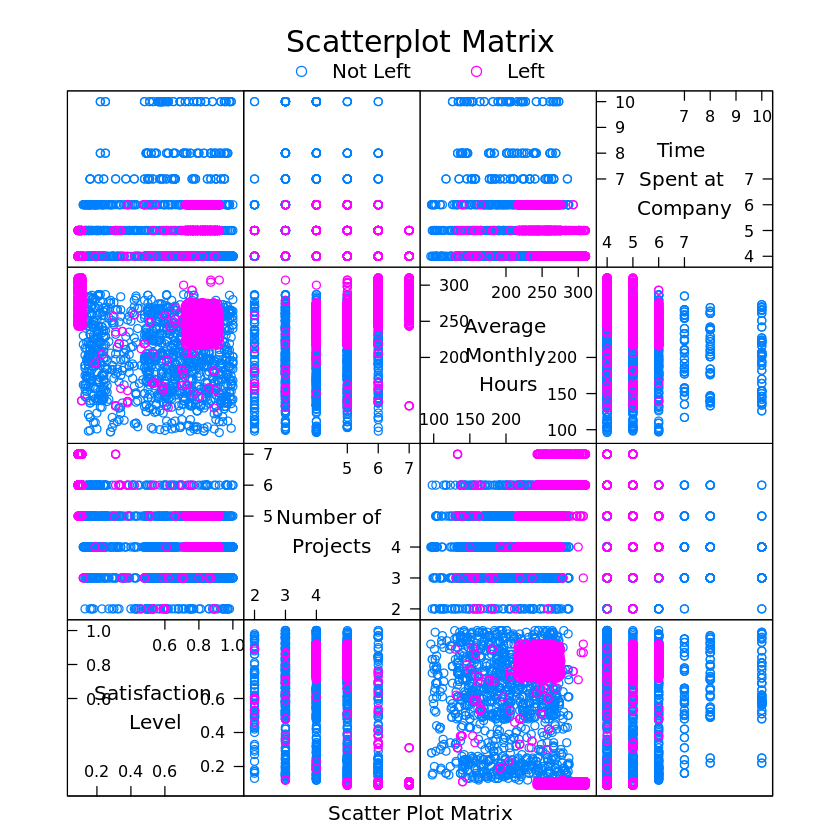

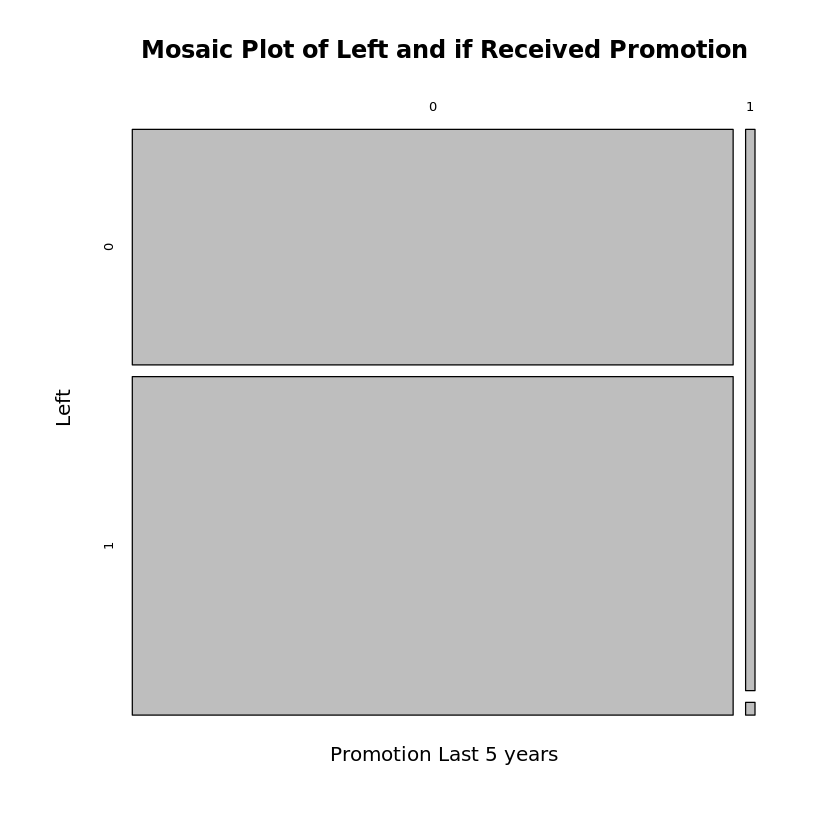

In [36]:
# Make scatterplot matrix
library('lattice')
key_columns <- subset(as.data.frame(best_and_exp), select=c('satisfaction_level', 'number_project', 'average_montly_hours','time_spend_company', 'left'))
super.sym <- trellis.par.get("superpose.symbol") #Get Symbol Plotting Information
splom(~key_columns[1:4],groups=left,data = key_columns,varnames=c("Satisfaction \nLevel", 'Number of \nProjects', "Average \nMonthly \nHours", 'Time \nSpent at \nCompany'),
      key = list(title = "Scatterplot Matrix",
                 columns = 2, 
                 points = list(pch = super.sym$pch[1:2],
                 col = super.sym$col[1:2]),
                 text = list(c("Not Left", "Left"))))

# Left compared with promotion
comp_table <- table(best_and_exp$promotion_last_5years, best_and_exp$left)
mosaicplot(comp_table, main='Mosaic Plot of Left and if Received Promotion', xlab='Promotion Last 5 years', ylab='Left')


The scatter plot matrix shows some interesting trends for the best and most experienced employees that have left. Things we can can conclude are these employees had generally spent 4-6 years at the company, completed 4-7 projects, worked longer hours, 200+ a month up to 300 hours, and had either a high satisfaction or a very low satisfaction with more tending to have a high satisfaction.   

I think that the lower satisfaction, best and most experienced employees, have left because of this dissatisfaction level either. It is more difficult to say whether this is directed towards the company or unsatisfaction with their line of work. The higher satisfaction, best and most experience employeers, that left may have sort better job offers or have been 'poached' by other compaines because of their talent. 

The mosaic comparing left to promotion received in last 5 years shows hardly any promotions within the company for best and most experienced employeers. However, nearly all promoted employees stay, while more than half of unpromoted employees mostly left, suggesting that the the left employees might have perceived a lack of opportunities to further advance their careers in the company.

---

# Exploring Unusual Data

Codifying which observations are "unusual" goes hand-in-hand with the statistical model for data; in particular the assumptions we make about the distribution of the residuals.

A common assumption in statistical analyses is that the residuals follow a *normal distribution*.

Let's simulate 200 normally distributed observations, synthesising heights (in cm) of adult men, plot a histogram, and display standard summary statistics.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  154.3   169.8   174.5   174.3   178.6   196.2 

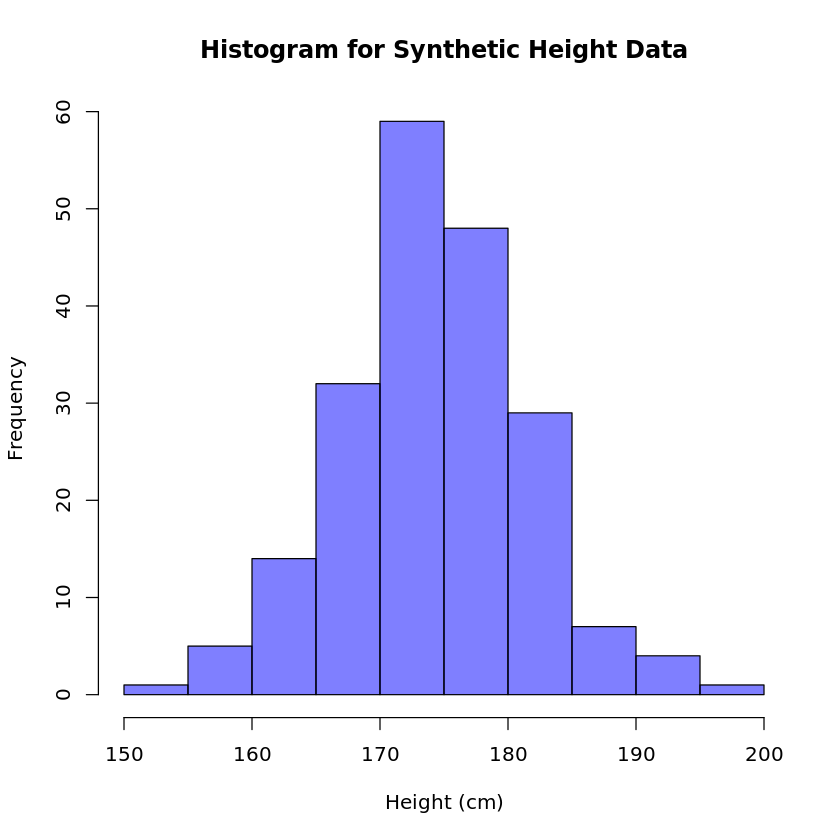

In [37]:
height_data<-rnorm(200, mean = 174.46, sd = 7.15) 
hist(height_data,col=rgb(0,0,1,0.5),main="Histogram for Synthetic Height Data", xlab="Height (cm)")
summary(height_data)

You will notice the symmetric unimodal shape of the histogram.  Re-run the code above several times and observe how the distribution of the data retains these characteristics.

Next, we will create a copy of the data, artificially convert the first 10 observations from units of cm to units of inches, plot another histogram, and display standard summary statistics. 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  62.13  168.85  174.32  169.09  178.42  196.18 

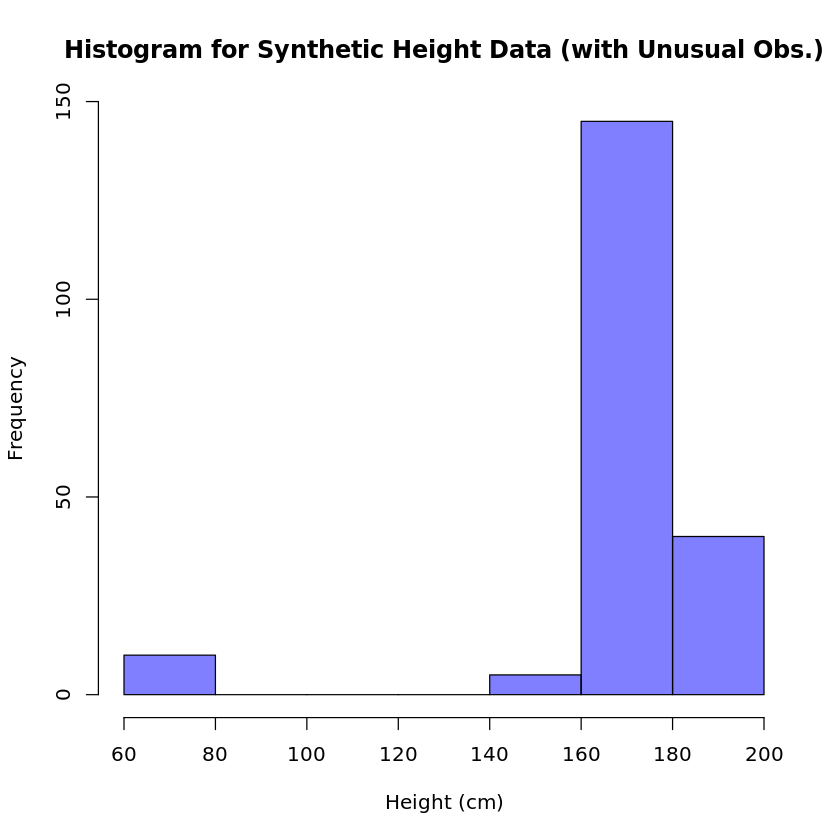

In [38]:
height_data_out<-height_data
height_data_out[1:10]<-height_data_out[1:10]*0.3937007874
hist(height_data_out,col=rgb(0,0,1,0.5),main="Histogram for Synthetic Height Data (with Unusual Obs.)", xlab="Height (cm)")
summary(height_data_out)

For this artifical data, it is immediately clear from the histogram that there are unusual observations, widely separated from the bulk.

Despite both being measures of central tendency, you will notice that the `mean` values have changed noticably, but the `median` values have barely moved.  This is because the `mean` is a sensitive statistic (and consequently is greatly impacted by unusual observations; influential observations in this case).  On the other hand the `median` is a rather insensitive (a *robust statistic*, and is hardly impacted by unusual observations).

Using simple robust measures of central tendency (median) and variability [interquartile range (IQR)], the boxplot visually flags observations that lie outside $\textrm{Median} \pm 1.5 \times \textrm{IQR}$.  These are the observations that may depart from the underlying assumption of normality; the outliers.

Let's create and store a boxplot of the height data with unusual observations.

In [28]:
hdo_box<-boxplot(height_data_out,main="Boxplot of Synthetic Height Data (with Unusual Obs.)", ylab="Height (cm)")

ERROR: Error in boxplot(height_data_out, main = "Boxplot of Synthetic Height Data (with Unusual Obs.)", : object 'height_data_out' not found


All of our artifical unusual observations are clearly labelled as outliers.  

We can extract them from the stored boxplot as follows.

In [40]:
hdo_box$out

[1]  71.80924  66.77157  63.50353  66.72739  65.84803  70.60876  62.13087
 [8]  68.53953  69.17501  67.72819 193.81746 196.18315 154.31728

In this instance, after examining the outliers and the context of the data set, it is clear that the reason for these outliers is a simple unit change.

# Part 3 Data Imputation

Let's load up Karl Pearsons' data on the heights (in inches) of fathers and their sons, produce a scatter plot of the data, and display standard summary statistics.

    fheight         sheight     
 Min.   :59.00   Min.   :58.50  
 1st Qu.:65.80   1st Qu.:66.90  
 Median :67.80   Median :68.60  
 Mean   :67.69   Mean   :68.68  
 3rd Qu.:69.60   3rd Qu.:70.50  
 Max.   :75.40   Max.   :78.40  

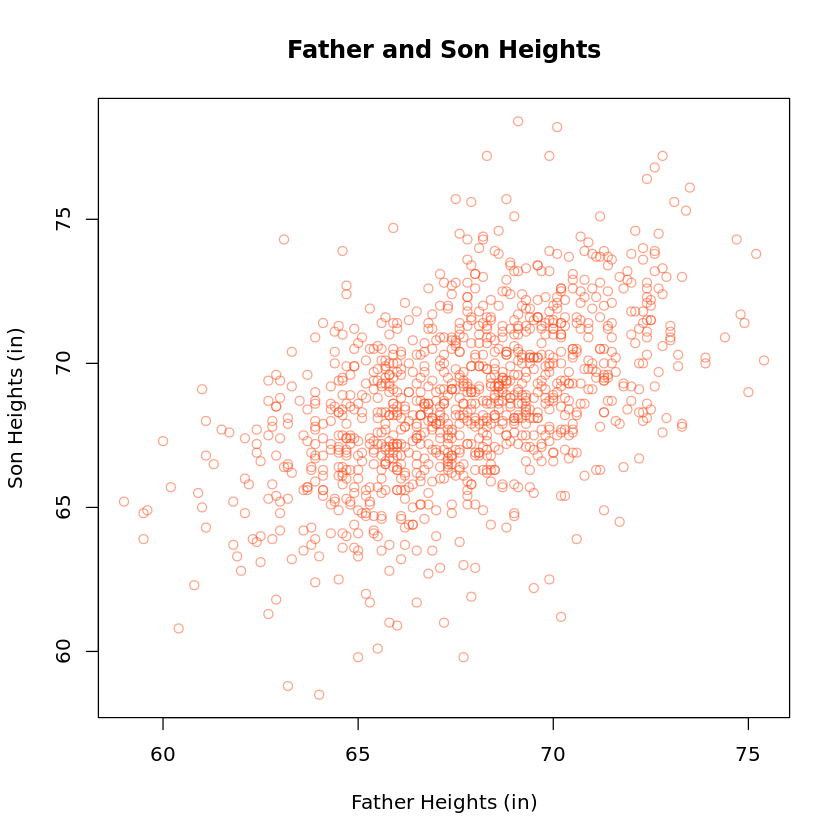

In [41]:
library("readr")
fheight<-read_csv("./PearsonFather.csv",col_names="fheight",col_types="d")
sheight<-read_csv("./PearsonSon.csv",col_names="sheight",col_types="d")
fs_height<-data.frame(fheight,sheight)
plot(fs_height$fheight,fs_height$sheight,main="Father and Son Heights", xlab="Father Heights (in)",ylab="Son Heights (in)",col=rgb(1,0.3,0.1,0.5))
summary(fs_height)

Now, let's create a version of the data set with both father and son heights missing completely at random (MCAR), plot the data, and display summary statistics. 

    fheight         sheight     
 Min.   :59.00   Min.   :58.50  
 1st Qu.:65.70   1st Qu.:66.90  
 Median :67.70   Median :68.60  
 Mean   :67.65   Mean   :68.71  
 3rd Qu.:69.53   3rd Qu.:70.50  
 Max.   :75.40   Max.   :78.40  
 NA's   :106     NA's   :123    

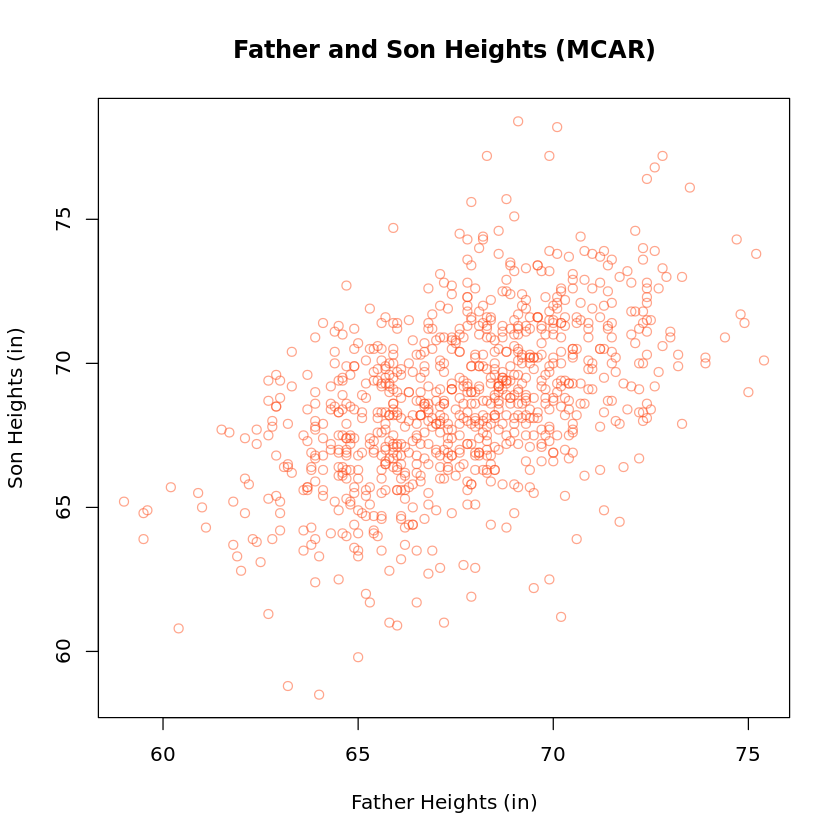

In [42]:
fheight_MCAR<-fheight
fheight_MCAR[rbinom(nrow(fheight),1,0.1)==1,]<-NA
sheight_MCAR<-sheight
sheight_MCAR[rbinom(nrow(sheight),1,0.1)==1,]<-NA
fs_height_MCAR<-data.frame(fheight_MCAR,sheight_MCAR)

plot(fs_height_MCAR$fheight,fs_height_MCAR$sheight,main="Father and Son Heights (MCAR)", xlab="Father Heights (in)",ylab="Son Heights (in)",col=rgb(1,0.3,0.1,0.5))
summary(fs_height_MCAR)

Now lets examine the effect of some simple imputation strategies, using the `mice` package.

First up is mean imputation (**not recommended ever in practice**)


Attaching package: ‘mice’

The following object is masked from ‘package:tidyr’:

    complete

The following objects are masked from ‘package:base’:

    cbind, rbind




 iter imp variable
  1   1  fheight  sheight


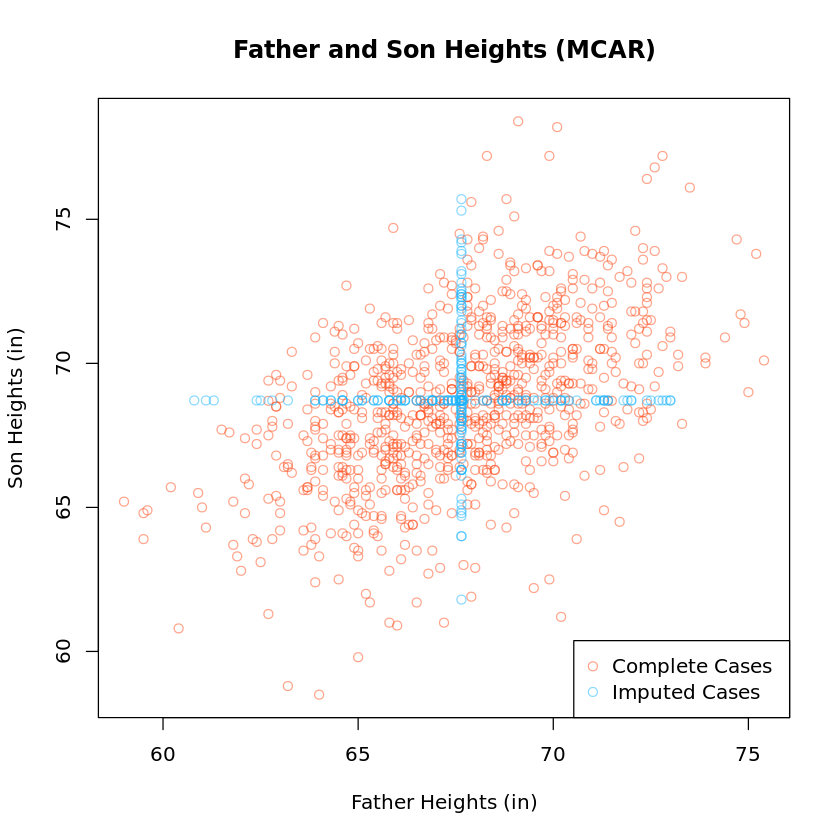

In [43]:
library("mice")
imp_mean<-mice(fs_height_MCAR,method="mean",m=1,maxit=1)
fsh_mean_imp<-complete(imp_mean,1)
fsh_mean_imp$mis<-!complete.cases(fs_height_MCAR)
plot(fsh_mean_imp$fheight[fsh_mean_imp$mis==FALSE],fsh_mean_imp$sheight[fsh_mean_imp$mis==FALSE],main="Father and Son Heights (MCAR)", xlab="Father Heights (in)",ylab="Son Heights (in)",col=rgb(1,0.3,0.1,0.5))
points(fsh_mean_imp$fheight[fsh_mean_imp$mis==TRUE],fsh_mean_imp$sheight[fsh_mean_imp$mis==TRUE],col=rgb(0.1,0.7,1,0.5))
legend("bottomright", c("Complete Cases","Imputed Cases"),pch=c(1,1),col=c(rgb(1,0.3,0.1,0.5), rgb(0.1,0.7,1,0.5)))

The distortion to the data is clearly observable in the plot above.  This distortion is reflected in its effect on the standard deviations of the variables, as can be seen as follows.

In [44]:
as.data.frame(lapply(fs_height,sd)) # Source Data Standard Deviations
as.data.frame(lapply(fs_height_MCAR,sd,na.rm=TRUE)) # Complete-case MCAR Data Standard Deviations
as.data.frame(lapply(fsh_mean_imp[1:2],sd,na.rm=TRUE)) # Mean-imputed MCAR Data Standard Deviations

fheight,sheight
2.745827,2.816194


fheight,sheight
2.738244,2.81775


fheight,sheight
2.600003,2.651971


With a small change in commands, we can perform linear regression imputation (using `method="norm.nob"`).


 iter imp variable
  1   1  fheight  sheight
  2   1  fheight  sheight
  3   1  fheight  sheight
  4   1  fheight  sheight
  5   1  fheight  sheight


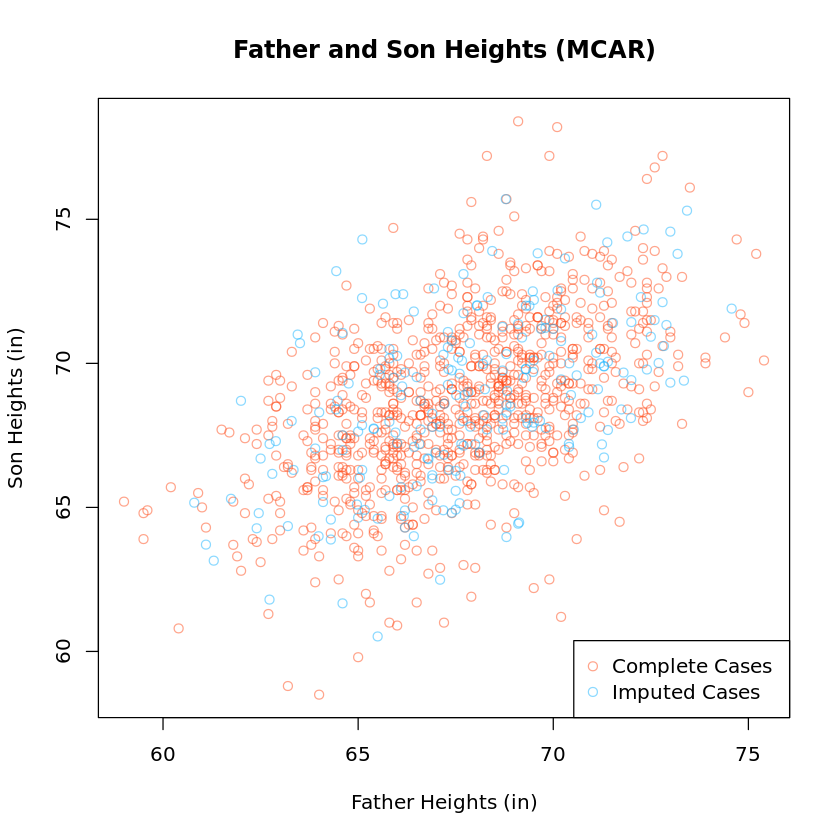

In [45]:
imp_linreg<-mice(fs_height_MCAR,method="norm.nob",m=1)
fsh_linreg_imp<-complete(imp_linreg,1)
fsh_linreg_imp$mis<-!complete.cases(fs_height_MCAR)
plot(fsh_linreg_imp$fheight[fsh_linreg_imp$mis==FALSE],fsh_linreg_imp$sheight[fsh_linreg_imp$mis==FALSE],main="Father and Son Heights (MCAR)", xlab="Father Heights (in)",ylab="Son Heights (in)",col=rgb(1,0.3,0.1,0.5))
points(fsh_linreg_imp$fheight[fsh_linreg_imp$mis==TRUE],fsh_linreg_imp$sheight[fsh_linreg_imp$mis==TRUE],col=rgb(0.1,0.7,1,0.5))
legend("bottomright", c("Complete Cases","Imputed Cases"),pch=c(1,1),col=c(rgb(1,0.3,0.1,0.5), rgb(0.1,0.7,1,0.5)))

Multiple imputation is requested by adjusting the `m=` argument; for example `m=10` will carry out the imputation process 10 times.

As a final exercise, we will fit a linear regression model to (1) the original data; (2) the complete-case data; (3) data multiply-imputated with linear regression;

In [46]:
fit_all<-with(fs_height,lm(sheight~fheight))

fit_MCAR<-with(fs_height_MCAR,lm(sheight~fheight))

mimp_linreg<-mice(fs_height_MCAR,method="norm.nob",m=10)
fit_linreg_mimp<-with(mimp_linreg,lm(sheight~fheight))



 iter imp variable
  1   1  fheight  sheight
  1   2  fheight  sheight
  1   3  fheight  sheight
  1   4  fheight  sheight
  1   5  fheight  sheight
  1   6  fheight  sheight
  1   7  fheight  sheight
  1   8  fheight  sheight
  1   9  fheight  sheight
  1   10  fheight  sheight
  2   1  fheight  sheight
  2   2  fheight  sheight
  2   3  fheight  sheight
  2   4  fheight  sheight
  2   5  fheight  sheight
  2   6  fheight  sheight
  2   7  fheight  sheight
  2   8  fheight  sheight
  2   9  fheight  sheight
  2   10  fheight  sheight
  3   1  fheight  sheight
  3   2  fheight  sheight
  3   3  fheight  sheight
  3   4  fheight  sheight
  3   5  fheight  sheight
  3   6  fheight  sheight
  3   7  fheight  sheight
  3   8  fheight  sheight
  3   9  fheight  sheight
  3   10  fheight  sheight
  4   1  fheight  sheight
  4   2  fheight  sheight
  4   3  fheight  sheight
  4   4  fheight  sheight
  4   5  fheight  sheight
  4   6  fheight  sheight
  4   7  fheight  sheight
  4   8  fheigh

The linear regression fits found using each approach are summarised as follows.

In [47]:
summary(fit_all)
summary(fit_MCAR)
summary(pool(fit_linreg_mimp))


Call:
lm(formula = sheight ~ fheight)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8910 -1.5361 -0.0092  1.6359  8.9894 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.89280    1.83289   18.49   <2e-16 ***
fheight      0.51401    0.02706   19.00   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.438 on 1076 degrees of freedom
Multiple R-squared:  0.2512,	Adjusted R-squared:  0.2505 
F-statistic: 360.9 on 1 and 1076 DF,  p-value: < 2.2e-16



Call:
lm(formula = sheight ~ fheight)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.7995 -1.5392  0.0373  1.6472  8.9775 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.17894    2.06315   16.08   <2e-16 ***
fheight      0.52451    0.03048   17.21   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.439 on 862 degrees of freedom
  (214 observations deleted due to missingness)
Multiple R-squared:  0.2557,	Adjusted R-squared:  0.2549 
F-statistic: 296.2 on 1 and 862 DF,  p-value: < 2.2e-16


,estimate,std.error,statistic,df,p.value
(Intercept),33.3387812,1.96435017,16.97191,339.2066,0
fheight,0.5228575,0.02901635,18.01941,336.7957,0


Other imputation methods include simple random imputation from observed data (`method="sample"`).

|<center>TASK</center>|
| ---- |
|Create and explore a single data set completed using simple random imputation.  Comment on how the data imputed using this method compares to data imputed using linear regression. |


---
**Solution**

In [ ]:
# Imputation by random sampling
imp_random<-mice(fs_height_MCAR, method='sample', m=1)
fsh_random<-complete(imp_random,1) # grab imputed values
fsh_random$mis<-!complete.cases(fs_height_MCAR) # create binary flag

# plot colours
orange = col=rgb(1,0.3,0.1,0.5)
blue = rgb(0.1,0.7,1,0.5)

# Plot data
plot(fsh_random$fheight[fsh_random$mis==FALSE], fsh_random$sheight[fsh_random$mis==FALSE], col=orange,
    main="Father and Son Heights (MCAR)", xlab='Father', ylab='Son')
points(fsh_random$fheight[fsh_random$mis==TRUE], fsh_random$sheight[fsh_random$mis==TRUE], col=blue)
points(fsh_linreg_imp$fheight[fsh_linreg_imp$mis==TRUE],fsh_linreg_imp$sheight[fsh_linreg_imp$mis==TRUE], col='green')
legend('bottomright', c('Complete Cases', 'Random Imputed Cases', 'Linear Regression Imputed Cases'), 
       pch=c(1,1,1), col=c(orange,blue,'green'), cex=0.7)

Data imputed using the simple random method compare similarly to the linear regression imputation. Visually it is generally hard to distinguish between the two methods. Perhaps random imputation has a higher tendancy to imputate outlier values as seen with more blue points located near the data extremes, thereby weakening the linear relationship present in the data.

---

# Extension

Although the focus in this course is on the more traditional tools of EDA, *text mining* and the associated visualisation of word frequencies through the use of *word clouds* are becoming increasingly prevalent.

In this extension, we will step through the basic process of reading in text data, preparing text data for text mining, determining word frequencies, and visualising the resulting frequencies in a word cloud.

Let's start by loading a few packages and some text data.

In [ ]:
library("tm") # Text mining library
library("wordcloud") # Wordcloud plotting library
ulysses_raw<-readLines("./pg1727.txt")
ulysses_raw<-ulysses_raw[342:10599] # Strip out front and back matter
ulysses<-Corpus(VectorSource(ulysses_raw)) # Convert to corpus format
inspect(ulysses[1:30]) # Inspect first 30 lines

To process the corpus and extract frequently used words (excluding commonly used words known as *stop words*), we need to remove punctuation, numbers, case of type, stop words, and strip out any excess whitespace.

In [ ]:
ulysses <- tm_map(ulysses, content_transformer(tolower)) # Convert corpus to lower case
ulysses <- tm_map(ulysses, removePunctuation) # Strip common punctuation
ulysses <- tm_map(ulysses, removeNumbers) # Strip numbers 
ulysses <- tm_map(ulysses, removeWords, stopwords("english")) # Strip default stop words

# Strip custom stop words
ulysses <- tm_map(ulysses, removeWords, c("i","and","are","it","ii","iii","iv","v","vi","vii","viii","ix","x","xi","xii","xiii","xiv","xv","xvi","xvii","xviii","xix","xx","xxi","xxii","xxiii","xxiv","xxv")) 

ulysses <- tm_map(ulysses, stripWhitespace) # Strip excess whitespace

inspect(ulysses[1:30]) # Inspect first 30 lines

Next we will create a *term document matrix*, which counts word occurence by corpus.  Then we keep only the most frequent words.

In [ ]:
ulysses_tdm <- TermDocumentMatrix(ulysses) # Create a table counting word occurences by corpus
ulysses_tdm_sparse<-removeSparseTerms(ulysses_tdm , 0.995) # Keep only words that appear more than (1-0.995)*10258 (around 51) times

From the sparse term document matrix, we will create word counts as follows.

In [ ]:
ulysses_tdms_matrix <- as.matrix(ulysses_tdm_sparse) # Convert to matrix for processing
ulysses_tdms_freqs <- sort(rowSums(ulysses_tdms_matrix),decreasing=TRUE) # Compute frequencies and sort
ulysses_tdms_freqs_df <- data.frame(terms = names(ulysses_tdms_freqs),freq=ulysses_tdms_freqs) # Construct data frame
head(ulysses_tdms_freqs_df, 5) # Inspect the top 5 words

Finally, we will plot the most common words in a *word cloud*, in which the size of the word is proportional to its frequency.

In [ ]:
set.seed(8888)
wordcloud(words = ulysses_tdms_freqs_df$terms, freq = ulysses_tdms_freqs_df$freq, min.freq = 1,max.words=100, random.order=FALSE, random.color=FALSE, rot.per=0.4,colors=brewer.pal(8, "Dark2"))